In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder

from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate

from scipy.stats import shapiro
import pickle


### **Business Problem Understanding**

#### **Context**

Tempat tinggal merupakan salah satu bentuk dari kebutuhan primer (papan). Karena tempat tinggal merupakan kebutuhan primer, maka kebutuhan akan tempat tinggal pada setiap orang harus selalu terpenuhi dan permintaannya pun akan selalu ada sepanjang masa. Sebagai negara bagian di Amerika Serikat dengan jumlah penduduk terbanyak, jumlah permintaan akan tempat tinggal di California tentunya sangatlah tinggi.

Karena tingginya permintaan akan tempat tinggal, banyak orang yang masuk ke dalam bisnis jual-beli rumah dengan tujuan untuk berinvestasi. Orang-orang ini membeli rumah bukan untuk ditempati, tapi untuk dijual lagi di masa depan dengan harapan harga rumah tersebut akan naik seiring dengan berjalannya waktu. Selain itu, banyak juga orang yang menjual rumah mereka dengan harga yang kurang masuk akan dengan tujuan untuk mendapatkan keuntungan sebesar-besarnya. Hal tersebut mengakibatkan sulitnya menentukan harga 'asli' dari suatu rumah.

#### **Problem Statement**

Sebagai negara bagian dengan luas wilayah terbesar ketiga di Amerika Serikat, berpergian untuk menentukan harga dari suatu rumah bisa memakan waktu dan biaya yang cukup besar. Sebuah perusahaan real estate di California harus mengeluarkan biaya yang besar jika lokasi rumah yang harganya ingin ditentukan cukup jauh dengan lokasi dari kantor perusahaan real estate tersebut.

#### **Goals**

Berdasarkan permasalahan diatas, dibutuhkan sebuah alat yang dapat membantu perusahaan real estate dalam menentukan harga dari suatu rumah hanya berdasarkan data spesifikasi dari rumah tersebut. Sehingga perusahaan real estate dapat menentukan harga suatu rumah tanpa harus datang langsung ke lokasi rumah tersebut. Hal tersebut tentunya akan mengurangi biaya perjalanan yang harus dikeluarkan oleh perusahaan.

#### **Analytic Approach**

Membuat suatu model regresi menggunakan machine learning yang dapat digunakan untuk menentukan harga suatu rumah dengan menganalisis data, dan mencari pola dari fitur-fitur yang ada untuk membedakan harga pada masing-masing rumah.

#### **Metric Evaluation**

### **Data Understanding**

- Dataset merupakan hasil sensus California pada tahun 1990.
- Setiap baris data berisi tentang informasi rumah yang ada di suatu distrik di California berdasarkan hasil sensus pada tahun 1990.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is |
| latitude | Float | A measure of how far north a house is |
| housingMedianAge | Float | Median age of a house within a block |
| totalRooms | Float | Total number of rooms within a block |
| totalBedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| medianIncome | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| medianHouseValue | Float | Median house value for households within a block (measured in US Dollars) |
| oceanProximity | Object | Location of the house w.r.t ocean/seas |

<br>

#### *Load Dataset*

In [3]:
house = pd.read_csv('data_california_house.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


#### *Check Tipe Kolom pada Dataset*

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Hasil diatas menunjukkan bahwa dataset 'California House Pricing' memiliki 10 total kolom, 9 diantaranya adalah kolom numerikal. Sedangkan kolom 'ocean proximity' merupakan kolom kategorikal. 

### **Data Cleaning**

Pada tahap data cleaning, akan dilakukan beberapa tahapan yang bertujuan agar data yang ada siap dipakai untuk analisa dan pembuatan model *Machine Learning* . Tahapan yang akan dilakukan adalah : 
- Drop Duplicate Row.
- Handling Missing Value.
- Anomaly Detection.
- Clear Data Outlier.

#### *Drop Duplicate Row*

In [5]:
print(f' Jumlah duplicate row : {house.duplicated().sum()}')

 Jumlah duplicate row : 0


Karena tidak ada duplicate row, maka tidak ada data yang dihapus pada proses ini

#### *Handling Missing Value*

##### *Check Jumlah Missing Value*

In [6]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terdapat 137 baris yang memiliki missing value pada kolom 'total_bedrooms'. Perlu dicek terlebih dahulu presentase baris missing value agar bisa ditentukan cara yang tepat untuk menangani missing value tersebut.

In [7]:
house.isnull().sum() * 100 / len(house)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

Presentase missing value pada kolom 'total_bedrooms' adalah 0.94%. Maka penanganannya adalah dengan mengisi baris yang memiliki missing value dengan mean atau median dari kolom tersebut. Jika data terdistribusi dengan normal, maka akan diisi dengan mean. Sedangkan median akan digunakan jika data tidak terdistribusi dengan normal.

##### *Menentukan Treatment yang Sesuai*

Create dataframe copy untuk uji normalitas kolom 'total_bedrooms' tanpa missing value

In [8]:
copy_house = house.copy()
copy_house.dropna(inplace=True)

check missing value pada dataframe 'copy_house'

In [9]:
copy_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Plot persebaran data 'total_bedrooms' tanpa missing value

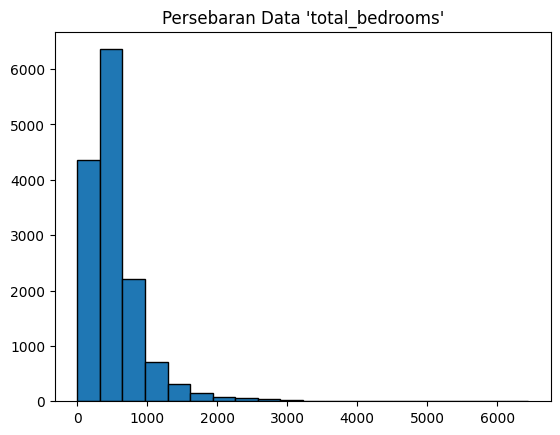

In [10]:
plt.hist(copy_house['total_bedrooms'], edgecolor='black', bins=20)
plt.title("Persebaran Data 'total_bedrooms'")
plt.show()

Uji normalitas pada kolom 'total_bedrooms' tanpa missing value

In [11]:
shapiro(copy_house['total_bedrooms'])

c:\Users\kenta\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7353052496910095, pvalue=0.0)

Berdasarkan plot grafik persebaran data yang tidak menunjukkan 'bell-shape' dan uji normalitas menggunakan Shapiro-Wilk test dengan hasil pvalue dibawah 0.05. Dapat disimpulkan bahwa kolom 'total_bedrooms' **tidak terdistribusi dengan normal**. Maka missing value pada kolom 'total_bedrooms' akan diisi dengan nilai **median** dari kolom tersebut.

##### *Input Nilai pada Missing Row*

*Input Nilai Menggunakan Median pada kolom 'total_bedrooms"*

In [12]:
house['total_bedrooms'].fillna(house['total_bedrooms'].median(), inplace=True)

*Check Jumlah Missing Value Setelah Input Nilai Median*

In [13]:
house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### *Anomaly Detection*

##### *Check Kolom Latitude dan Longitude*

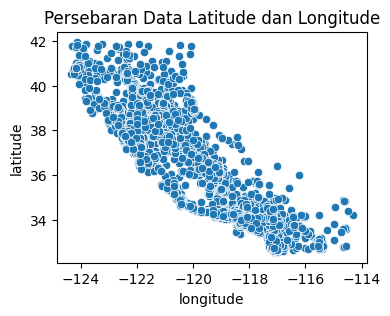

In [14]:
plt.figure(figsize=(4, 3))
plt.title('Persebaran Data Latitude dan Longitude')
sns.scatterplot(data = house,
                x = 'longitude',
                y = 'latitude')
plt.show()

<img src="https://worldmapblank.com/wp-content/uploads/2020/10/Labeled-Map-of-California-State.jpg" alt="drawing" width="400"/>

Karena plot dari data latitude dan longitude cukup mirip dengan map California, maka saya anggap tidak ada anomaly pada kolom latitude dan longitude

##### *Check Kolom housing_median_age*

Pada kolom 'housing_median_age', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin umur dari sebuah rumah nilainya dibawah 0.

In [15]:
house['housing_median_age'].value_counts().to_frame().reset_index().rename(columns={"index": "housing_median_age", "housing_median_age": "Value Count"}).sort_values(by='housing_median_age')
#No anomaly

,housing_median_age,Value Count
51,1.0,2
49,2.0,37
48,3.0,45
41,4.0,139
35,5.0,184
43,6.0,117
44,7.0,117
39,8.0,145
40,9.0,144
34,10.0,186


##### *Check Kolom total_rooms*

Pada kolom 'total_rooms', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin jumlah ruangan pada sebuah rumah nilainya dibawah 0.

In [16]:
house['total_rooms'].value_counts().to_frame().reset_index().rename(columns={"index": "total_rooms", "total_rooms": "Value Count"}).sort_values(by='total_rooms')
#No anomaly

,total_rooms,Value Count
4434,2.0,1
3928,6.0,1
3225,8.0,1
4633,11.0,1
3154,12.0,1
...,...,...
3709,30401.0,1
3342,30405.0,1
3573,30450.0,1
4827,32054.0,1


##### *Check Kolom total_bedrooms*

Pada kolom 'total_bedrooms', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin jumlah kamar tidur pada sebuah rumah nilainya dibawah 0.

In [17]:
house['total_bedrooms'].value_counts().to_frame().reset_index().rename(columns={"index": "total_bedrooms", "total_bedrooms": "Value Count"}).sort_values(by='total_bedrooms')
#No anomaly

,total_bedrooms,Value Count
1374,1.0,1
1210,2.0,2
881,3.0,4
756,4.0,6
926,5.0,4
...,...,...
1389,4957.0,1
1379,5027.0,1
1400,5033.0,1
1679,5290.0,1


##### *Check Kolom population*

Pada kolom 'population', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin jumlah penghuni pada sebuah blok perumahan nilainya dibawah 0.

In [18]:
house['population'].value_counts().to_frame().reset_index().rename(columns={"index": "population", "population": "Value Count"}).sort_values(by='population')
#No anomaly

,population,Value Count
3368,3.0,1
3072,5.0,1
3074,6.0,1
1903,8.0,3
2519,9.0,1
...,...,...
2589,13251.0,1
2639,15037.0,1
2433,15507.0,1
3185,28566.0,1


##### *Check Kolom households*

Pada kolom 'households', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin jumlah kepala keluarga pada sebuah blok perumahan nilainya dibawah 0.

In [19]:
house['households'].value_counts().to_frame().reset_index().rename(columns={"index": "households", "households": "Value Count"}).sort_values(by='households')
#No anomaly

,households,Value Count
1276,1.0,1
928,2.0,3
922,3.0,3
1026,4.0,3
783,5.0,5
...,...,...
1296,4616.0,1
1363,4769.0,1
1297,4855.0,1
1564,5050.0,1


##### *Check Kolom median_income*

Pada kolom 'median_income', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin nilai median dari penghasilan setiap kepala keluarga pada suatu blok perumahan nilainya dibawah 0.

In [20]:
house['median_income'].value_counts().to_frame().reset_index().rename(columns={'index': "median_income", "median_income": "Value Count"}).sort_values(by='median_income')
#No anomaly

,median_income,Value Count
77,0.4999,8
105,0.5360,7
6700,0.5495,1
6040,0.6433,1
5846,0.6775,1
...,...,...
4180,13.9470,1
8924,14.2867,1
3806,14.9009,1
1032,15.0000,2


##### *Check Kolom ocean_proximity*

Pada kolom 'ocean_proximity', kategori yang saya anggap sebagai anomaly adalah kategori yang tidak menggambarkan seberapa jauh jarak suatu rumah ke laut.

In [21]:
house['ocean_proximity'].value_counts()
#No anomaly

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

##### *Check Kolom median_house_value*

Pada kolom 'median_house_value', nilai yang saya anggap sebagai anomaly adalah nilai yang kurang dari 0 (negatif). Nilai negatif saya anggap sebagai anomaly karena tidak mungkin nilai median dari harga sebuah rumah pada blok perumahan nilainya dibawah 0.

In [22]:
house['median_house_value'].value_counts().to_frame().reset_index().rename(columns={'index': "median_house_value", "median_house_value": "Value Count"}).sort_values(by='median_house_value')
#No anomaly

,median_house_value,Value Count
1798,14999.0,3
3032,17500.0,1
2018,22500.0,3
2824,25000.0,1
3542,26600.0,1
...,...,...
3152,498700.0,1
2972,499000.0,1
3135,499100.0,1
29,500000.0,18


#### *Clear Data Outlier*

Outlier dapat mengacaukan pola pada sebuah data. Hal tersebut akan mempengaruhi hasil prediksi dari model Machine Learning. Oleh karena itu, outlier perlu untuk dihandle agar bisa dihasilkan model Machine Learning yang optimal.

##### *Plot Boxplot pada Setiap Kolom Numerikal di Dataset*

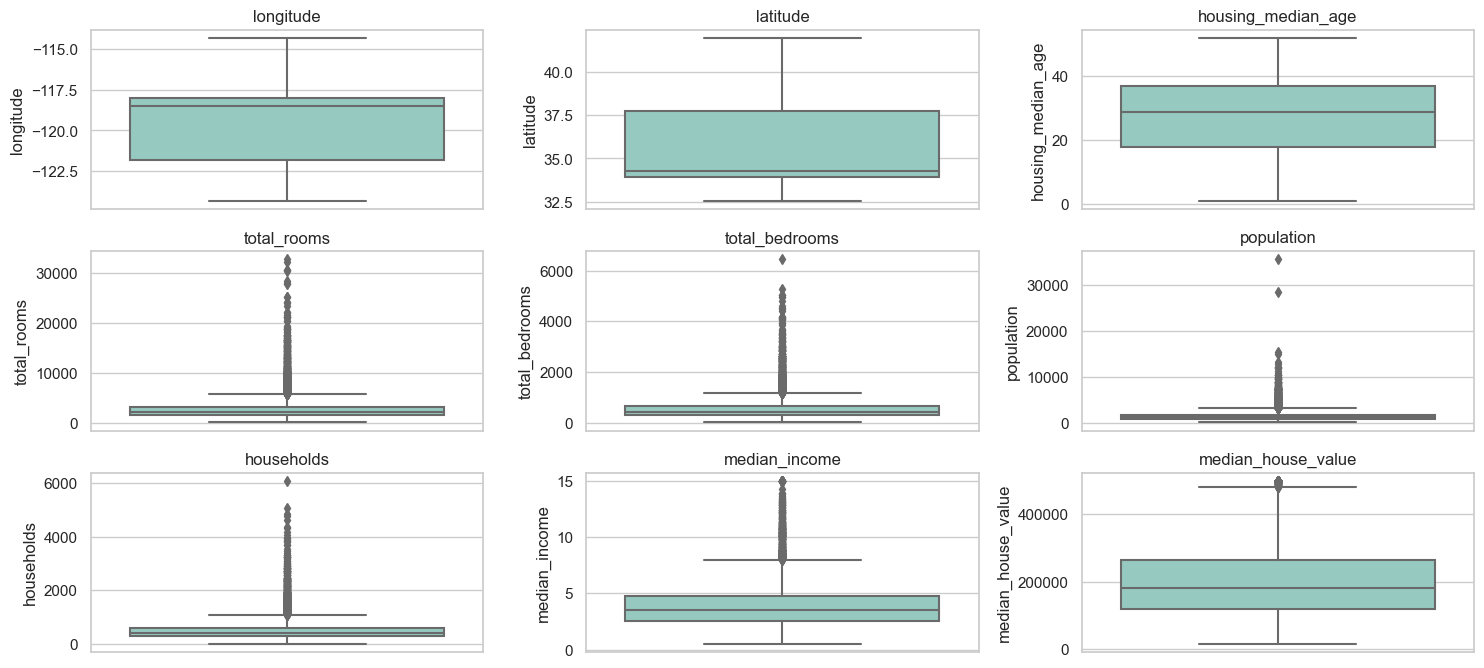

In [23]:
# Numerical Features
num_feature = [fea for fea in house.describe().columns]
num_feature

plt.figure(figsize=(15, 9))
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(y=feature, data=house);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Ada banyak outlier pada hampir setiap kolom. Meskipun outlier sangat banyak, outlier pada suatu kolom banyak yang nilainya tidak jauh berbeda antara satu sama lain, sehingga masih membentuk suatu pola. Oleh karena itu, saya hanya akan membuang data outlier yang 'extreme'. Yaitu outlier yang nilainya jauh berbeda dengan outlier lainnya pada suatu kolom.

##### *Outlier pada Kolom 'housing_median_age'*

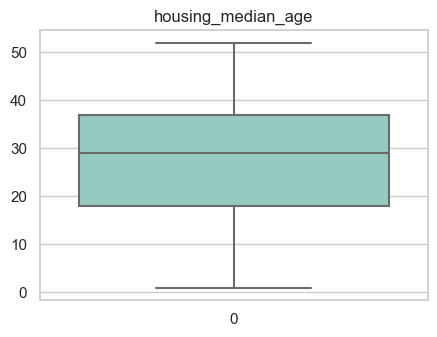

In [24]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['housing_median_age'])
plt.title('housing_median_age')
plt.show()

Tidak ada outlier pada kolom 'housing_median_age'. Oleh karena itu, tidak ada data yang didrop pada kolom ini

##### *Outlier pada Kolom 'total_rooms'*

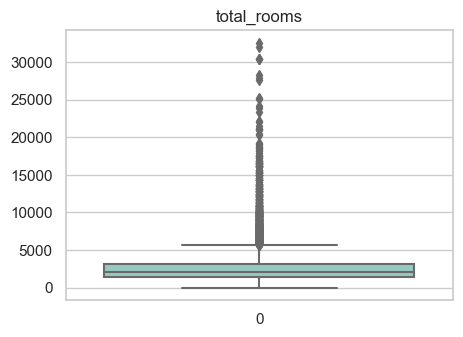

In [25]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['total_rooms'])
plt.title('total_rooms')
plt.show()

Ada beberapa outlier yang nilainya jauh dari outlier lainnya pada kolom 'total_rooms', sehingga bisa dikatakan sebagai 'extreme' outlier. Untuk melihat row yang memiliki nilai extreme outlier, saya melakukan sort pada kolom 'total_rooms' secara descending

In [26]:
house.sort_values(by='total_rooms',ascending=False).head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
8061,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
12960,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,<1H OCEAN,174300.0
12079,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,NEAR OCEAN,399200.0
13215,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,<1H OCEAN,212300.0
11231,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,<1H OCEAN,451100.0
10900,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,INLAND,212200.0
12657,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,<1H OCEAN,339700.0
167,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,<1H OCEAN,321300.0
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0


Ada 8 row yang memiliki nilai extreme outlier pada kolom 'total_rooms'. Oleh karena itu, saya drop 8 row tersebut berdasarkan indexnya pada dataframe.

In [27]:
house.drop([4124,8061,12960,12079,13215,11231,10900,12657],inplace=True)

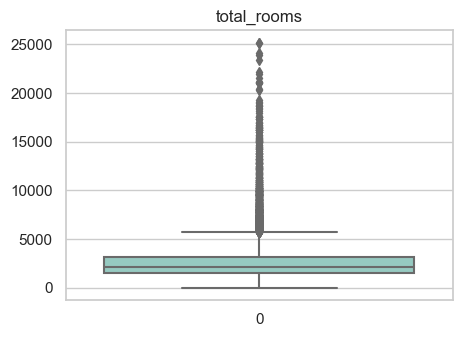

In [28]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['total_rooms'])
plt.title('total_rooms')
plt.show()

Setelah dilakukan drop pada 8 row tersebut, tidak ada lagi extreme outlier pada kolom 'total_rooms'

##### *Outlier pada Kolom 'total_bedrooms'*

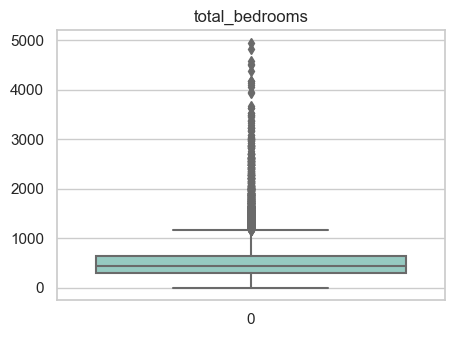

In [29]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['total_bedrooms'])
plt.title('total_bedrooms')
plt.show()

Ada beberapa outlier yang nilainya jauh dari outlier lainnya pada kolom 'total_bedrooms', sehingga bisa dikatakan sebagai 'extreme' outlier. Untuk melihat row yang memiliki nilai extreme outlier, saya melakukan sort pada kolom 'total_bedrooms' secara descending

In [30]:
house.sort_values(by='total_bedrooms',ascending=False).head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9809,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,INLAND,103400.0
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0
14362,-117.22,32.86,4.0,16289.0,4585.0,7604.0,4176.0,3.6287,NEAR OCEAN,280800.0
6578,-116.36,33.78,6.0,24121.0,4522.0,4176.0,2221.0,3.3799,INLAND,239300.0
14295,-121.68,36.72,12.0,19234.0,4492.0,12153.0,4372.0,3.2652,<1H OCEAN,152800.0
13131,-118.43,34.43,5.0,21113.0,4386.0,9842.0,3886.0,4.2037,<1H OCEAN,194600.0
5585,-118.60,34.19,16.0,14912.0,4183.0,5105.0,3302.0,2.8312,<1H OCEAN,213900.0
13945,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,INLAND,144000.0
6058,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,NEAR OCEAN,244900.0
10138,-117.61,34.10,9.0,18956.0,4095.0,10323.0,3832.0,3.6033,INLAND,132600.0


Ada 6 row yang memiliki nilai extreme outlier pada kolom 'total_bedrooms'. Oleh karena itu, saya drop 6 row tersebut berdasarkan indexnya pada dataframe.

In [31]:
house.drop([9809,12511,14362,6578,14295,13131],inplace=True)

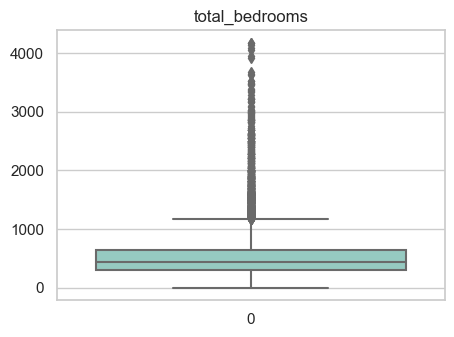

In [32]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['total_bedrooms'])
plt.title('total_bedrooms')
plt.show()

Setelah dilakukan drop pada 6 row tersebut, tidak ada lagi extreme outlier pada kolom 'total_bedrooms'

##### *Outlier pada Kolom 'population'*

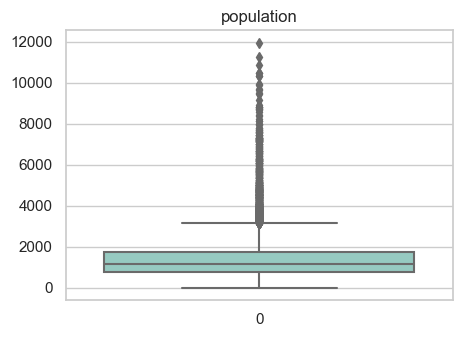

In [33]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['population'])
plt.title('population')
plt.show()

Ada beberapa outlier yang nilainya jauh dari outlier lainnya pada kolom 'population', sehingga bisa dikatakan sebagai 'extreme' outlier. Untuk melihat row yang memiliki nilai extreme outlier, saya melakukan sort pada kolom 'population' secara descending

In [34]:
house.sort_values(by='population',ascending=False).head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
167,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,<1H OCEAN,321300.0
4168,-121.61,36.69,19.0,9899.0,2617.0,11272.0,2528.0,2.0244,<1H OCEAN,118500.0
6058,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,NEAR OCEAN,244900.0
13945,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,INLAND,144000.0
3911,-117.75,34.01,4.0,22128.0,3522.0,10450.0,3258.0,6.1287,<1H OCEAN,289600.0
5649,-121.40,38.47,4.0,20982.0,3392.0,10329.0,3086.0,4.3658,INLAND,130600.0
10138,-117.61,34.10,9.0,18956.0,4095.0,10323.0,3832.0,3.6033,INLAND,132600.0
8177,-118.55,34.41,8.0,21086.0,3945.0,9936.0,3790.0,5.8602,<1H OCEAN,265100.0
11001,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,INLAND,81300.0
6431,-117.83,33.97,11.0,21533.0,3078.0,9671.0,2890.0,7.0329,<1H OCEAN,368300.0


Ada 2 row yang memiliki nilai extreme outlier pada kolom 'population'. Oleh karena itu, saya drop 2 row tersebut berdasarkan indexnya pada dataframe.

In [35]:
house.drop([167,4168],inplace=True)

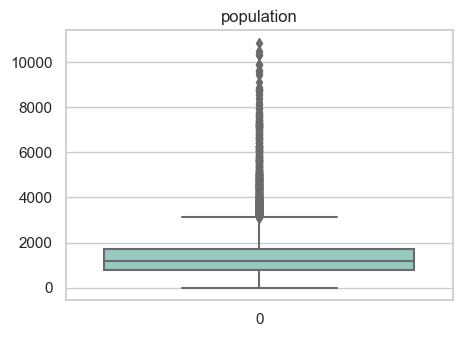

In [36]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['population'])
plt.title('population')
plt.show()

Setelah dilakukan drop pada 2 row tersebut, tidak ada lagi extreme outlier pada kolom 'population'

##### *Outlier pada Kolom 'households'*

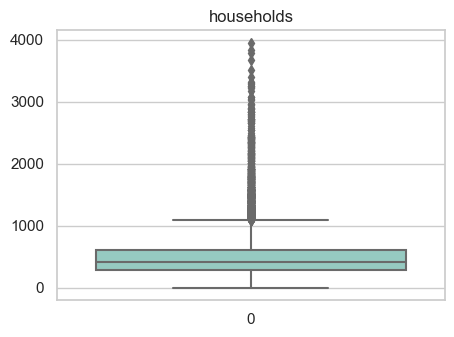

In [37]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['households'])
plt.title('households')
plt.show()

Tidak ada extreme outlier pada kolom 'households'. Oleh karena itu, tidak ada data yang didrop pada kolom ini

##### *Outlier pada Kolom 'median_income'*

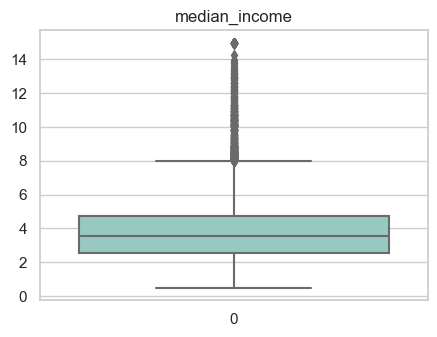

In [38]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['median_income'])
plt.title('median_income')
plt.show()

Tidak ada extreme outlier pada kolom 'median_income'. Oleh karena itu, tidak ada data yang didrop pada kolom ini

##### *Outlier pada Kolom 'median_house_value'*

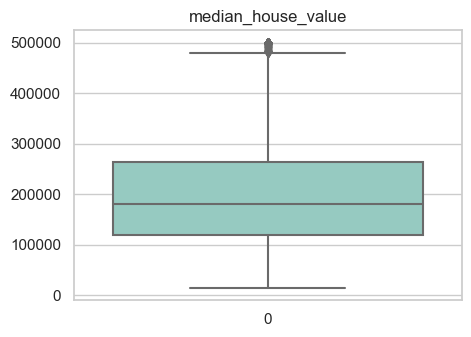

In [39]:
plt.figure(figsize=(5,3.5))
sns.boxplot(house['median_house_value'])
plt.title('median_house_value')
plt.show()

Tidak ada extreme outlier pada kolom 'median_house_value'. Oleh karena itu, tidak ada data yang didrop pada kolom ini

##### *Reset Index Dataframe*

In [40]:
house = house.reset_index(drop=True)

Reset index dilakukan agar index kembali berurutan dikarenakan ada beberapa index yang tidak ada setelah beberapa row didrop pada proses sebelumnya.

##### *Export Clean Dataset to CSV File*

In [41]:
house.to_csv('data_california_house_clean.csv', index=False)

### **Correlation Matrix**

Correlation matrix digunakan untuk melihat seberapa besar pengaruh sebuah variable dalam mempengaruhi nilai dari variable lainnya.

C:\Users\kenta\AppData\Local\Temp\ipykernel_14068\3225201192.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = house.corr(method='pearson')


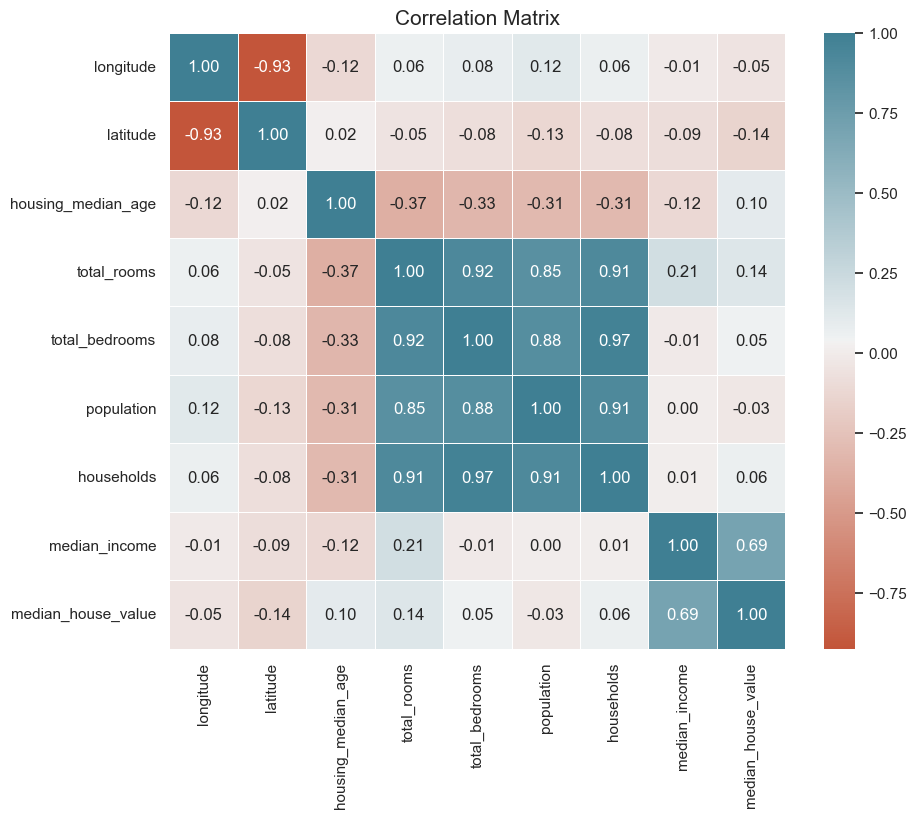

In [42]:
plt.figure(figsize=(10, 8))
palette=sns.diverging_palette(20, 220, n=256)
corr = house.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15);
plt.show()

Berdasarkan matrix diatas, variable median_house_value memiliki korelasi yang cukup tinggi dengan variable median_income. Hal ini menunjukkan bahwa semakin tinggi nilai median dari penghasilan setiap kepala keluarga pada suatu blok perumahan, maka harga rumah pada blok tersebut akan makin tinggi.

### **Limitasi Model**

In [43]:
house['median_house_value'].describe()

count     14432.000000
mean     206797.088068
std      115377.812284
min       14999.000000
25%      119600.000000
50%      179900.000000
75%      263825.000000
max      500001.000000
Name: median_house_value, dtype: float64

Karena nilai dari kolom median_house_value pada dataset ini rentangnya ada di antara 14.999 - 500.001, maka model ini hasilnya akan lebih baik jika memprediksi harga rumah yang ada pada rentan tersebut.

### **Modeling**

#### *Encoding dan Scaling*

Agar kolom yang bersifat kategorikal dapat digunakan sebagai fitur pada model, kolom tersebut harus diubah menjadi fitur numerikal. Saya menggunakan OneHotEncoder karena kolom 'ocean_proximity' memiliki 5 unique value. Yang mana masih ada pada batas jumlah maksimal dari OneHotEncoder. Selain encoding, saya juga melakukan scaling pada kolom numerikal agar nilai-nilai pada kolom tersebut besarnya jadi tidak terlalu jauh. Saya menggunakan ColumnTransformer untuk mengubah kolom tersebut, yang mana nanti dapat diaplikasikan pada pipeline model .

In [44]:
scaler = Pipeline([
        ('scaler', RobustScaler())
    ])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(), ['ocean_proximity']),
    ('scaler', scaler, ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income']),
], remainder='passthrough')

#### *Split Fitur dan Target*

In [45]:
x = house.drop(columns=['median_house_value']) #x sebagai fitur
y = house['median_house_value'] #y sebagai target

#### *Split Data Train dan Test*

Pada bagian ini, saya membagi data menjadi 2 bagian, yaitu data train dan data test. Perbandingan antara data train dan data test adalah 80:20

In [46]:
# Split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, 
    y,
    test_size=0.2,
    random_state=100
)

#### *Model Benchmarking*

Algoritma yang akan saya gunakan pada model ini adalah LinearRegression, DecisionTreeRegressor, KNeighborsRegressor, XGBRegressor, dan RandomForestRegressor. Pada proses ini, saya akan mengambil 2 model terbaik berdasarkan MAPE pada hasil Cross Validate untuk dilakukan predict ke data test dan kemudian dilanjutkan dengan melakukan hyperparameter tuning pada 2 model terpilih.

In [47]:
linreg = LinearRegression()
dt = DecisionTreeRegressor(random_state=100)
knn = KNeighborsRegressor()
xgb = XGBRegressor()    
rfr = RandomForestRegressor(random_state=100)

model = [linreg,dt,knn,xgb,rfr]

In [48]:
list_model = []
list_mae = []
list_mape = []
list_rmse = []
mape_std = []

for i in model:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', i) 
    ])

    # cross validation
    cv_score = cross_validate( 
        estimator= pipe_model,  # model
        X = xtrain,            # X_train
        y = ytrain,            # y_train
        cv = 5,                 # berapa fold
        scoring= ['neg_mean_absolute_error','neg_mean_absolute_percentage_error',
                  'neg_mean_squared_error','neg_root_mean_squared_error']
    )
    
    list_model.append(i)
    list_mae.append(cv_score['test_neg_mean_absolute_error'].mean()) 
    list_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
    list_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
    mape_std.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

In [49]:
Hasil = pd.DataFrame()
Hasil['Model'] = list_model
Hasil['MAE'] = np.negative(list_mae)
Hasil['MAPE'] = np.negative(list_mape)
Hasil['RMSE'] = np.negative(list_rmse)
Hasil['MAPE std'] = mape_std

Hasil.sort_values(by='MAPE')

,Model,MAE,MAPE,RMSE,MAPE std
3,"XGBRegressor(base_score=None, booster=None, ca...",3.317553e+04,1.852705e-01,4.984316e+04,2.540676e-03
4,RandomForestRegressor(random_state=100),3.393841e+04,1.902186e-01,5.166351e+04,4.986193e-03
2,KNeighborsRegressor(),3.957625e+04,2.136657e-01,5.934479e+04,3.941798e-03
1,DecisionTreeRegressor(random_state=100),4.614775e+04,2.520054e-01,7.204643e+04,8.549909e-03
0,LinearRegression(),7.126586e+12,2.478813e+07,3.424471e+14,4.957625e+07


Berdasarkan hasil cross validate, XGBRegressor dan RandomForestRegressor adalah 2 model terbaik karena memiliki nilai MAPE yang terendah dibandingkan dengan model lainnya. Maka, 2 model tersebut akan digunakan untuk predict ke test set.

####  *Prediksi Data Test dengan 2 Benchmark Model Terbaik*

In [50]:
rfr_1 = RandomForestRegressor(random_state=100)
xgb_1 = XGBRegressor()

predict_cv = [rfr_1,xgb_1]

predict_MAE = []
predict_MAPE = []
predict_RMSE = []

for j in predict_cv:
    pipe_model = Pipeline([
        ('preprocessing',transformer),
        ('modeling',j)
    ])

    #fit
    pipe_model.fit(xtrain,ytrain)

    #predict
    ypredict = pipe_model.predict(xtest)
    predict_MAE.append(mean_absolute_error(ytest,ypredict))
    predict_MAPE.append(mean_absolute_percentage_error(ytest,ypredict))
    predict_RMSE.append(np.sqrt(mean_squared_error(ytest, ypredict)))

Hasil_predict = pd.DataFrame()
Hasil_predict['Model'] = ['RandomForestRegressor','XGBRegressor']
Hasil_predict['MAE'] = predict_MAE
Hasil_predict['MAPE'] = predict_MAPE
Hasil_predict['RMSE'] = predict_RMSE
Hasil_predict.sort_values(by='MAPE')

,Model,MAE,MAPE,RMSE
0,RandomForestRegressor,32146.998625,0.173770,47389.480213
1,XGBRegressor,32165.189109,0.176221,46984.722961


Berdasarkan hasil prediksi pada test set dengan menggunakan 2 model benchmark, RandomForestRegressor memiliki performa yang lebih baik dibandingkan dengan XGBRegressor karena memiliki nilai MAPE yang lebih rendah.

####  *Hyperparameter Tuning*

Hyperparameter tuning dilakukan dengan tujuan untuk meningkatkan performa dari model. Model yang akan saya tuning adalah 2 model benchmark yang digunakan pada prediksi data test.

#####  XGBRegressor

Parameter pada XGBRegressor yang akan saya tuning adalah sebagai berikut : 
- Scaler
- Gamma
- Learning Rate
- Max Depth

In [51]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

hyperparam_space = {
    'preprocessing__scaler__scaler': [minmax,standard,robust],
    'algorithm__max_depth' : np.arange(1,10),
    'algorithm__gamma' : np.arange(0,5),
    'algorithm__learning_rate' : np.arange(0, 1.1, 0.1)
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('algorithm', XGBRegressor())
])

gridsearch = GridSearchCV(
    estimator=pipe_model,           # model  
    param_grid=hyperparam_space,    # hyperparameter yang mau dituning
    cv=5,                           # jumlah fold  
    scoring='neg_mean_absolute_percentage_error',                   # metrics
    verbose=1,
    n_jobs=-1                       # pakai semua processor
)

In [52]:
gridsearch.fit(xtrain, ytrain)

Fitting 5 folds for each of 1485 candidates, totalling 7425 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(),
                                                                         ['ocean_proximity']),
                                                                        ('scaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income'])])),
                                       ('algorithm',
                                        XGBRegressor(base_...
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'algorithm__gamma': array([0, 1, 2, 3, 4]),
                         'algorithm__learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'algorithm__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'preprocessing__scaler__scaler': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler()]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [53]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

-0.17675624011448554
{'algorithm__gamma': 0, 'algorithm__learning_rate': 0.1, 'algorithm__max_depth': 9, 'preprocessing__scaler__scaler': MinMaxScaler()}


Berdasarkan hasil hyperparameter tuning, parameter terbaik pada XGBRegressor adalah : 
- Gamma : 0
- Learning Rate : 0.1
- Max Depth : 9
- Scaler : MinMax Scaler

#####  RandomForestRegressor

Parameter pada RandomForestRegressor yang akan saya tuning adalah sebagai berikut : 
- Scaler
- Max Depth
- Min Samples Split
- Min Sample Leaf

In [54]:
hyperparam_space = {
    'preprocessing__scaler__scaler': [minmax, standard, robust],
    'algorithm__max_depth' : np.arange(1,10),
    'algorithm__min_samples_split' : np.arange(2,10),
    'algorithm__min_samples_leaf' : np.arange(1,10)
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('algorithm', RandomForestRegressor(random_state=100))
])

gridsearch = GridSearchCV(
    estimator=pipe_model,           # model  
    param_grid=hyperparam_space,    # hyperparameter yang mau dituning
    cv=5,                           # jumlah fold  
    scoring='neg_mean_absolute_percentage_error',                   # metrics
    verbose=1,
    n_jobs=-1                       # pakai semua processor
)

In [55]:
gridsearch.fit(xtrain, ytrain)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(),
                                                                         ['ocean_proximity']),
                                                                        ('scaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income'])])),
                                       ('algorithm',
                                        RandomForestRegressor(random_state=100))]),
             n_jobs=-1,
             param_grid={'algorithm__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'algorithm__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'algorithm__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'preprocessing__scaler__scaler': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler()]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [56]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

-0.21557182750585238
{'algorithm__max_depth': 9, 'algorithm__min_samples_leaf': 6, 'algorithm__min_samples_split': 2, 'preprocessing__scaler__scaler': RobustScaler()}


Berdasarkan hasil hyperparameter tuning, parameter terbaik pada RandomForestRegressor adalah : 
- Max Depth : 9
- Min Samples Leaf : 6
- Min Samples Split : 2
- Scaler : Robust Scaler

#### *Prediksi Data Test dengan Model Setelah Tuning*

Pada tahapan ini saya akan melakukan prediksi pada data test dengan menggunakan model XGBoostRegressor dan RandomForestRegressor. Hasil dari prediksi kedua model ini akan saya bandingkan dengan hasil prediksi sebelum dilakukan tuning untuk menentukan model akhir yang akan digunakan.

##### Prediksi dengan XGBRegressor Setelah Tuning

In [57]:
predict_MAE_xgb = []
predict_MAPE_xgb = []
predict_RMSE_xgb = []

pipe_model_xgb = Pipeline([
    ('preprocessing',transformer),
    ('scaler', MinMaxScaler()),
    ('modeling',XGBRegressor(gamma= 0,learning_rate=0.1,max_depth=9))
])

#fit
pipe_model_xgb.fit(xtrain,ytrain)

#predict
ypredict_xgb = pipe_model_xgb.predict(xtest)
predict_MAE_xgb.append(mean_absolute_error(ytest,ypredict_xgb))
predict_MAPE_xgb.append(mean_absolute_percentage_error(ytest,ypredict_xgb))
predict_RMSE_xgb.append(np.sqrt(mean_squared_error(ytest, ypredict_xgb)))

Hasil_predict_xgb = pd.DataFrame()
Hasil_predict_xgb['Model'] = ['XGBRegressor After Tuning']
Hasil_predict_xgb['MAE'] = predict_MAE_xgb
Hasil_predict_xgb['MAPE'] = predict_MAPE_xgb
Hasil_predict_xgb['RMSE'] = predict_RMSE_xgb
Hasil_predict_xgb

,Model,MAE,MAPE,RMSE
0,XGBRegressor After Tuning,30705.116642,0.166642,45592.53979


##### Prediksi dengan RandomForestRegressor Setelah Tuning

In [58]:
predict_MAE_rfr = []
predict_MAPE_rfr = []
predict_RMSE_rfr = []

pipe_model_rfr = Pipeline([
    ('preprocessing',transformer),
    ('scaler', RobustScaler()),
    ('modeling',RandomForestRegressor(random_state=100, max_depth=9, min_samples_leaf=6, min_samples_split=2))
])

#fit
pipe_model_rfr.fit(xtrain,ytrain)

#predict
ypredict_rfr = pipe_model_rfr.predict(xtest)
predict_MAE_rfr.append(mean_absolute_error(ytest,ypredict_rfr))
predict_MAPE_rfr.append(mean_absolute_percentage_error(ytest,ypredict_rfr))
predict_RMSE_rfr.append(np.sqrt(mean_squared_error(ytest, ypredict_rfr)))

Hasil_predict_rfr = pd.DataFrame()
Hasil_predict_rfr['Model'] = ['RandomForestRegressor After Tuning']
Hasil_predict_rfr['MAE'] = predict_MAE_rfr
Hasil_predict_rfr['MAPE'] = predict_MAPE_rfr
Hasil_predict_rfr['RMSE'] = predict_RMSE_rfr
Hasil_predict_rfr

,Model,MAE,MAPE,RMSE
0,RandomForestRegressor After Tuning,37347.295034,0.205498,52963.890996


#### *Final Model*

In [59]:
hasil_after_tuning = pd.concat([Hasil_predict, Hasil_predict_xgb,Hasil_predict_rfr], ignore_index=True)
hasil_after_tuning.sort_values(by='MAPE')

,Model,MAE,MAPE,RMSE
2,XGBRegressor After Tuning,30705.116642,0.166642,45592.539790
0,RandomForestRegressor,32146.998625,0.173770,47389.480213
1,XGBRegressor,32165.189109,0.176221,46984.722961
3,RandomForestRegressor After Tuning,37347.295034,0.205498,52963.890996


Berdasarkan hasil prediksi pada data test, **XGBRegressor setelah dilakukan tuning** adalah model dengan performa terbaik karena memiliki nilai **MAPE** terendah, yaitu **16.6%**. Sehingga model tersebut akan digunakan untuk memprediksi harga rumah. 

Nilai MAPE sebesar 16.6% menjadikan model ini masuk kedalam kategori **good forecast**.

#### *Actual vs Prediction Price*

Grafik ini digunakan untuk melihat seberapa besar error dari hasil prediksi dari suatu model. Semakin dekat jarak suatu titik dari garis merah, maka nilai errornya makin kecil.

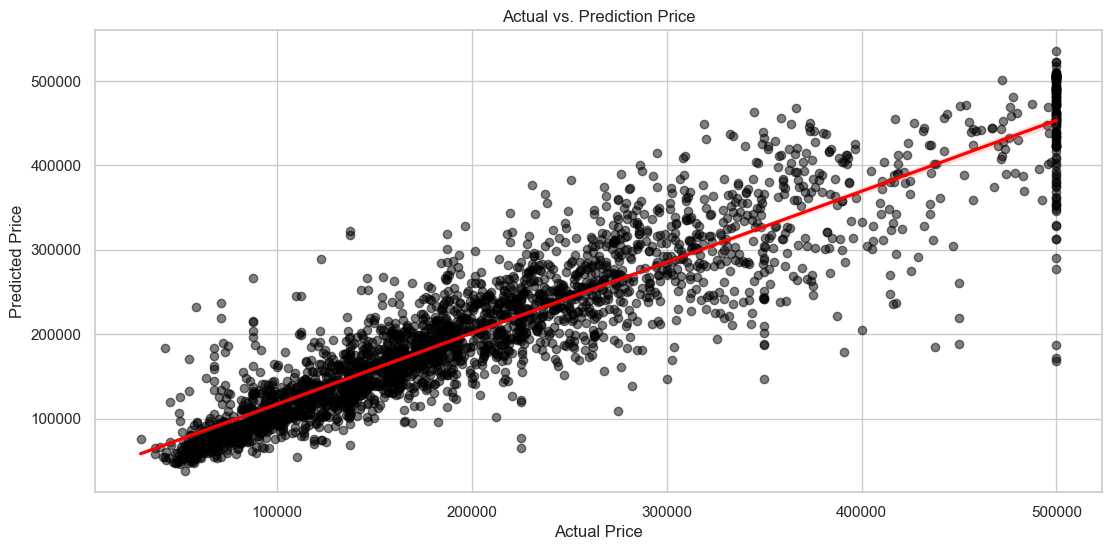

In [60]:
plt.figure(figsize=(13, 6))
sns.regplot(x=ytest, y=ypredict_xgb,
                    scatter_kws = {"color": "black", "alpha" : 0.5},
                    line_kws = {"color": "red"}).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');
plt.show()

#### *Feature Importance*

Feature importance dilakukan untuk mengetahui seberapa besar pengaruh sebuah fitur dalam mempengaruhi nilai dari target.

In [61]:
feature_imp = pd.DataFrame(pipe_model_xgb['modeling'].feature_importances_, transformer.get_feature_names_out()).reset_index()
feature_imp.rename(columns={'index' : 'Feature', 0 : 'Importance Value'}).sort_values(by='Importance Value', ascending=False)


,Feature,Importance Value
2,one_hot__ocean_proximity_3,0.635950
10,scaler__median_income,0.194738
11,remainder__longitude,0.033134
12,remainder__latitude,0.032031
1,one_hot__ocean_proximity_2,0.018549
8,scaler__population,0.016877
5,scaler__housing_median_age,0.015599
7,scaler__total_bedrooms,0.014497
9,scaler__households,0.011295
3,one_hot__ocean_proximity_4,0.010739


Data diatas menunjukkan bahwa jarak suatu rumah ke laut sangat mempengaruhi harga dari suatu rumah. Diikuti dengan nilai median dari penghasilan setiap kepala keluarga pada suatu blok perumahan.

#### *Save Model*

In [62]:
model_xgb_tune = Pipeline([
    ('preprocessing',transformer),
    ('scaler', MinMaxScaler()),
    ('modeling',XGBRegressor(gamma= 0,learning_rate=0.1,max_depth=9))
])

pickle.dump(model_xgb_tune, open('California_house_model.sav', 'wb'))

### **Kesimpulan**

- Berdasarkan proses modeling yang telah dilakukan, fitur yang paling mempengaruhi harga dari sebuah rumah adalah 'ocean_proximity'.

- Model final yang akan digunakan adalah model dengan algoritma XGBRegressor yang telah dilakukan hyperparameter tuning. XGBRegressor memiliki nilai MAPE (Mean Absolute Percantage Error) sebesar 17.6%. Setelah dilakukan hyperparameter tuning, performa model tersebut meningkat hingga hanya memiliki MAPE sebesar 16.6%. Artinya, prediksi harga dari model akan meleset kurang lebih 16.6% dari harga asli.

- Performa model final akan lebih baik jika digunakan hanya untuk memprediksi harga rumah yang ada di rentan 14.999 - 500.001 USD. Jika diluar rentan tersebut, error yang dihasilkan bisa lebih besar karena model tidak dilatih untuk mengenali nilai yang ada diluar rentan tersebut.

### **Reccomendation**

Untuk meningkatkan performa dari model, ada beberapa langkah lanjutan yang dapat dilakukan. Yaitu : 

1. Memperbanyak fitur yang memiliki korelasi dengan harga rumah, karena model ini hanya dilatih menggunakan 9 fitur.
2. Menambah data harga rumah dengan harga yang ada diluar rentan 14.999 - 500.001 USD. Agar model memiliki rentan harga prediksi yang lebih besar.
3. Menambah variable baru yang *dituning* pada proses hyperparameter tuning. Selain menambah variable baru, rentan nilai yang *dituning* pada variable yang sudah digunakan juga diperbesar. Tentunya hal tersebut juga harus diikuti dengan penambahan *resource* komputasi agar proses modeling tidak membutuhkan waktu yang terlalu lama.
4. Melakukan modeling dengan model *Machine Learning* yang lebih kompleks, seperti *Deep Learning*.
